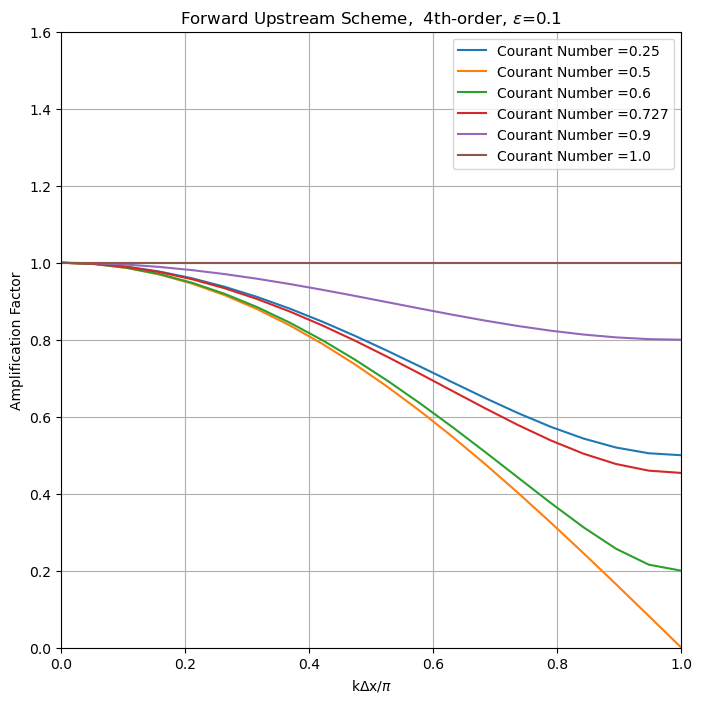

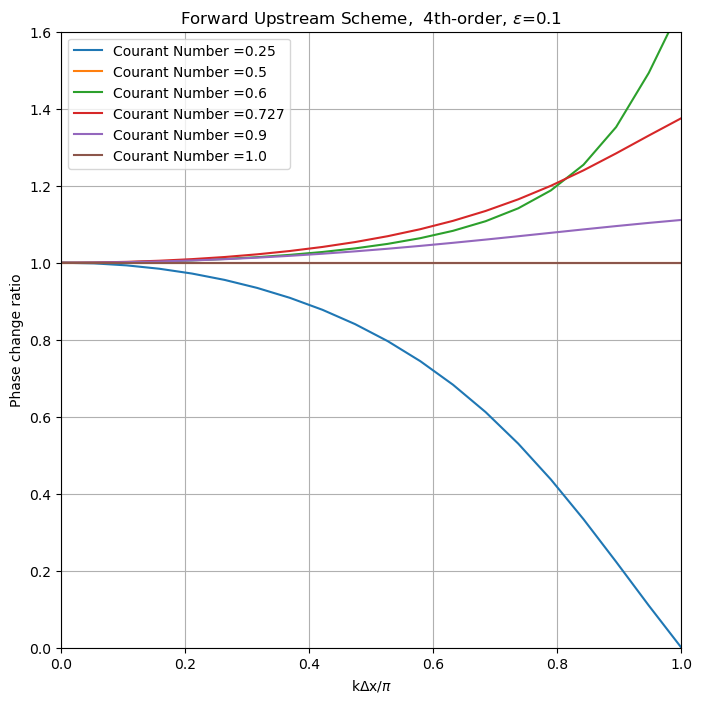

1.3736263736263736


In [8]:
import matplotlib.pyplot as plt
import numpy as np
import math

PI = np.pi

# Create some example data for the curve
x = np.linspace(0, 1, 20)  # Generate 100 points from 0 to 10

P = np.zeros((x.size))
Pp = np.zeros((x.size))
Pm = np.zeros((x.size))
A = np.zeros((x.size))
Ap = np.zeros((x.size))
Am = np.zeros((x.size))

F = np.zeros((x.size))

# Calcualte and plot amplification factor

plt.figure(figsize=(8, 8))  # Optional: Set the figure size
plt.ylim(0,1.6)
plt.xlim(0,1)

#Courant = np.array([0.1,0.2, 0.3,0.4,0.5,0.6,0.7,0.8,0.9]) 
Courant = np.array([0.25,0.5,0.6,0.727,0.9, 1.0]) 


scheme = 'Leapfrog-Centered'
scheme = 'Forward Upstream'

epslon = 0.1  # Asslin time filter coefficient

s_order = 2  # Leapfrog in time, 2nd order in space
s_order = 4  # Leapfrog in time, 4th order in space

if s_order == 4:
    order_str = ' 4th-order, '
else:
    order_str = ''

for i in range(0,Courant.size):

    C = Courant[i]
    
    for ix in range(0, x.size ):
      beta = x[ix] * PI
      if scheme == 'Leapfrog-Centered':

        if epslon != 0:
            a = C*np.sin(x[ix]*PI)
            b =(1-epslon)**2
            if b-a**2 >= 0:
                I = -a
                Rp = epslon+(b-a**2)**0.5
                Rm = epslon-(b-a**2)**0.5
                Ap[ix] = np.sqrt( I**2+Rp**2 )
                Am[ix] = np.sqrt( I**2+Rm**2 )
            else:
                Ip = -a+(a**2-b)**0.5
                Im = -a-(a**2-b)**0.5
                R = epslon
                Ap[ix] = np.sqrt( Ip**2+R**2 )
                Am[ix] = np.sqrt( Im**2+R**2 )
        else:
            A[ix] = 1+x[ix]*0.0
            Ap[ix] = A[ix]
            Am[ix] = A[ix]
        F[ix]= 4*np.sin(beta)/3-np.sin(2*beta)/6
        
      elif scheme == 'Forward Upstream': 
        A[ix] = np.sqrt( 1+2*C*(C-1)*(1-np.cos(x[ix]*PI)) )  # Amplification factor of FTUS scheme
        Am[ix]=A[ix]
        Ap[ix]=A[ix]
    
#    Ap[0]=1
#    Am[0]=1
#    A[0]=1
    
# Create the plot
    label_str = 'Courant Number =' + str( C )
    if scheme == 'Leapfrog-Centered':
        plt.plot(x, Ap, label=label_str)  # Plot the data
        plt.plot(x, Am, label=label_str, linestyle='dashed')  # Plot the data
        
#        plt.plot(x, F, label=label_str)  # Plot the data
#        F[:] = 1/0.728
#        plt.plot(x, F, label=label_str)  # Plot the data
    else:
        plt.plot(x, A, label=label_str)  # Plot the data

# Add labels and title
    plt.xlabel('k$\Delta$x/$\pi$')
    plt.ylabel('Amplification Factor')
    plt.title(scheme+' Scheme, '+order_str+'$\epsilon$='+str(epslon))

# Add a legend
plt.legend()

# Display the plot
plt.grid(True)  # Optional: Add grid lines
plt.show()

# Calcualte and plot phase change ratio

plt.figure(figsize=(8, 8))  # Optional: Set the figure size
plt.ylim(0,1.6)
plt.xlim(0,1)
for i in range(0,Courant.size):

    C = Courant[i]
    for ix in range(1, x.size ):
        beta = x[ix] * PI
        theta_a = - C * beta
        
        if scheme == 'Leapfrog-Centered':
            if s_order == 2:  # 2nd order centered difference
                a = C*np.sin(beta)
            else:
                a = C*(4*np.sin(beta)/3-np.sin(2*beta)/6)
                
            if epslon != 0: # 
                b =(1-epslon)**2
                if b-a**2 >= 0:
                    I = -a
                    Rp = epslon+np.sqrt(b-a**2)
                    Rm = epslon-np.sqrt(b-a**2)
                    R = Rp
                else:
                    Ip = -a+(a**2-b)**0.5
                    Im = -a-(a**2-b)**0.5
                    I = Ip
                    R = epslon
            else:
                if s_order == 2:  # 2nd order centered difference
                    I = -a
                    R =  np.sqrt( 1-a**2 )  
                    if beta > PI/2 and C == 1:
                        R = -np.sqrt( 1-a**2 )
                else:  # 4th order centered difference
                    I = -a
                    R =  np.sqrt( 1-a**2 )  
        elif scheme == 'Forward Upstream': 
            I = -C*np.sin(beta)
            R = 1-C+C*np.cos(beta)  # Upwind scheme

        theta_d = np.arctan2( I, R) # Phase change of FD scheme
                    
        P[ix]=theta_d/theta_a
#        print(ix, C, theta_a, theta_d, I, R )      
    P[ 0 ] = 1

# Create the plot
    label_str = 'Courant Number =' + str( C )
    plt.plot(x, P, label=label_str)  # Plot the data

# Add labels and title
    plt.xlabel('k$\Delta$x/$\pi$')
    plt.ylabel('Phase change ratio')
    plt.title(scheme+' Scheme, '+order_str+'$\epsilon$='+str(epslon))

# Add a legend
plt.legend()

# Display the plot
plt.grid(True)  # Optional: Add grid lines
plt.show()

print( 1/0.728 )